In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the CSV
filepath = "Resources/lending_data.csv"
df=pd.read_csv(filepath)
print(df.shape)
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


#### Check the data
---
Check to see if the data needs to be imputed, encoded, or scaled

In [3]:
# Check if data needs to be imputed or encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


Data does not need to be imputed or encoded because there are no nulls and all values are numeric

In [4]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


Looking at the values, we will need to do a scaler on the features. There is a lot of variations between features, so we should scale the data\
Given the number of features, we will not reduce the number of features

In [5]:
# Define the features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

In [6]:
# Scaling
# subset
df_sub = df.loc[:, features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


##### Define `X` and `y` and run a `train_test_split`

In [7]:
# Get the Data
X = df_scaled
y = df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Review the y series and the X dataframe
display(y.head())
display(X.head())

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


### Check the different models
---
Check to see how the following models predict the loan status

In [8]:
# Function for doing Regressions
def regModel(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mae)
    
    # Training Metrics
    results = f""" Train Metrics:
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """

    print(results)

    # Test Metrics
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mae)
    
    results = f""" Test Metrics:
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(results)

    # Visualize test results
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

#### Logistic Regression
---

 Train Metrics:
    R2: 0.8118160459250419
    MSE: 0.005852195782549816
    RMSE: 0.07649964563675976
    MAE: 0.005852195782549816
    
 Test Metrics:
    R2: 0.8124075094533474
    MSE: 0.00593242197575445
    RMSE: 0.07702221741649905
    MAE: 0.00593242197575445
    


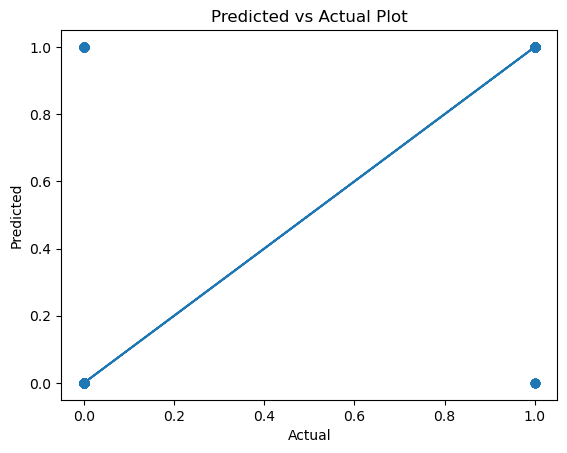

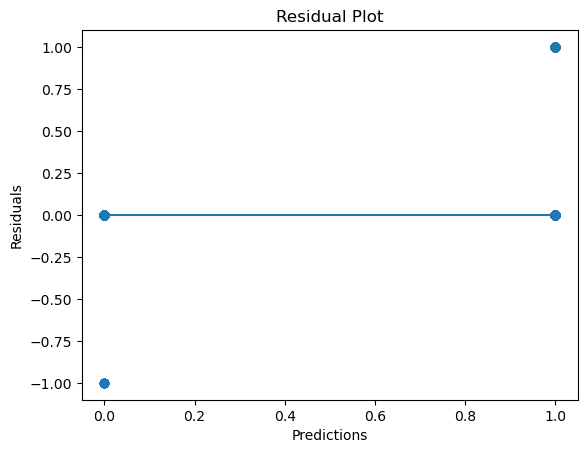

In [10]:
# init the model
lgr = LogisticRegression(random_state=1)

regModel(lgr, X_train, X_test, y_train, y_test)